In [62]:
import prepare
import acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = prepare.prepare_stores()
df.index

The number of unique days is 1826
Number of days between first and last day is  1826 days 00:00:00


Index(['01-01-2013', '01-01-2013', '01-01-2013', '01-01-2013', '01-01-2013',
       '01-01-2013', '01-01-2013', '01-01-2013', '01-01-2013', '01-01-2013',
       ...
       '31-12-2017', '31-12-2017', '31-12-2017', '31-12-2017', '31-12-2017',
       '31-12-2017', '31-12-2017', '31-12-2017', '31-12-2017', '31-12-2017'],
      dtype='object', name='sale_date', length=547800)

In [64]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [65]:
print("Date Range is: ", df.index.min(), 'to', df.index.max())
print('Shape', df.shape[0])

Date Range is:  01-01-2013 to 31-12-2017
Shape 547800


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


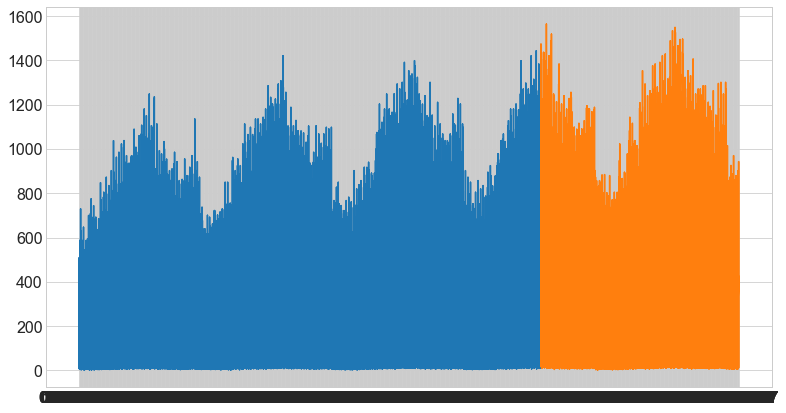

In [66]:
# Percentage Based split
train_size = 0.70
n = df.shape[0]
test_start_index = round(train_size * n)

# train is the data up to the 70% cut line
train = df[:test_start_index]
# test is the data after the 70% cut line
test = df[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


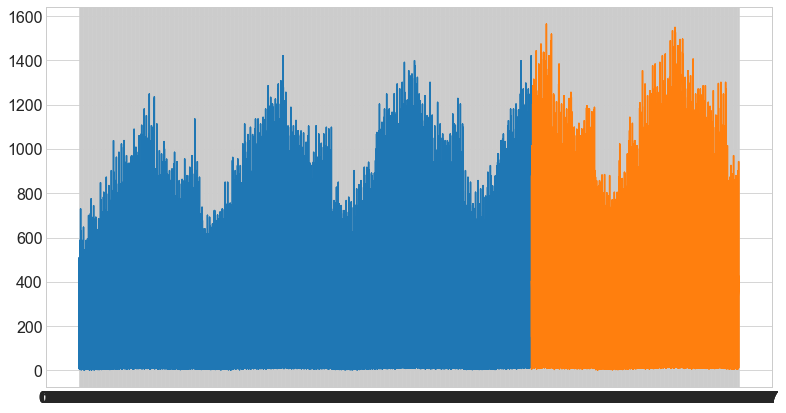

In [67]:
# Human Based split
# Our dataset is from JAN 2013 - DEC 2017

train = df[:'06-06-2016']
test = df['06-06-2016':]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [68]:
# Visualizations
y = train.sales_total
y.head()

sale_date
01-01-2013    177.98
01-01-2013    109.35
01-01-2013    437.25
01-01-2013    167.40
01-01-2013     18.62
Name: sales_total, dtype: float64

In [81]:
y.index = pd.to_datetime(y.index)

In [82]:
y.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2016-06-06', '2016-06-06', '2016-06-06', '2016-06-06',
               '2016-06-06', '2016-06-06', '2016-06-06', '2016-06-06',
               '2016-06-06', '2016-06-06'],
              dtype='datetime64[ns]', name='sale_date', length=375900, freq=None)

<AxesSubplot:title={'center':'Distribution of Sales Totals'}, xlabel='Sales Totals, in Dollars', ylabel='Frequency'>

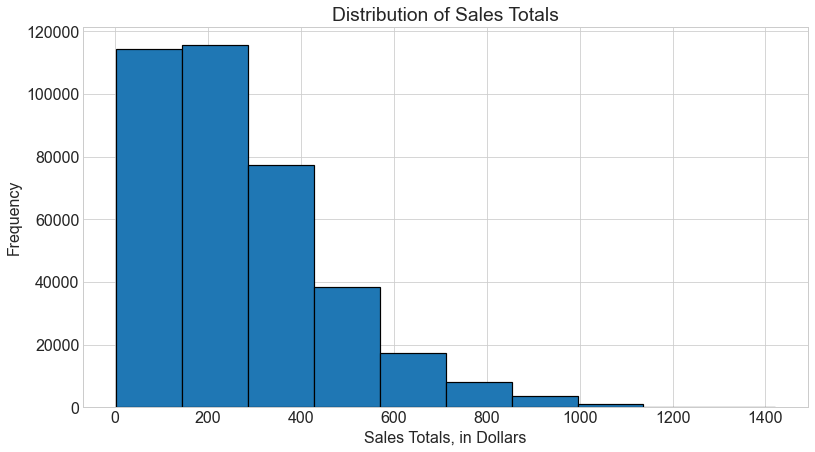

In [69]:
# Histogram
plt.title('Distribution of Sales Totals')
plt.xlabel('Sales Totals, in Dollars')
y.plot.hist(linewidth=1.2, edgecolor='black')

In [77]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2016-06-06', '2016-06-06', '2016-06-06', '2016-06-06',
               '2016-06-06', '2016-06-06', '2016-06-06', '2016-06-06',
               '2016-06-06', '2016-06-06'],
              dtype='datetime64[ns]', name='sale_date', length=375900, freq=None)

In [95]:
train['month'] = train.index.strftime('%m')
train['day'] = train.index.strftime('%d')

In [94]:
train.sample(10)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total,day
sale_date,,,,,,,,,,,,,,,,,
2016-01-31,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk,9.02,28400029254,28400029254,40.0,709614,9,735 SW Military Dr,San Antonio,TX,78221,01,Sun,360.80,31
2014-09-11,Barefoot,32,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,39.0,574042,5,1520 Austin Hwy,San Antonio,TX,78218,09,Sun,26.52,11
2016-02-18,Moms Best Naturals,42,Moms Best Naturals Cereal Toasted Cinnamon Squares,2.97,883978129115,883978129115,29.0,753456,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,02,Thu,86.13,18
2014-02-16,Dove,48,Dove Men + Care Antiperspirant Deodorant Cool Silver,3.72,79400271631,79400271631,57.0,860458,2,9255 FM 471 West,San Antonio,TX,78251,02,Sun,212.04,16
2013-03-24,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,54.0,516841,4,516 S Flores St,San Antonio,TX,78204,03,Sun,467.10,24
2016-02-16,Bear Naked,47,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,7.38,884623708976,884623708976,33.0,853884,8,15000 San Pedro Ave,San Antonio,TX,78232,02,Tue,243.54,16
2014-11-23,Smart Living,24,Smart Living Charcoal Lighter Fluid,5.34,688267084225,688267084225,90.0,437106,10,8503 NW Military Hwy,San Antonio,TX,78231,11,Sun,480.60,23
2015-03-10,Nakano,37,Nakano Seasoned Rice Vinegar Original,9.59,73575295003,73575295003,24.0,667496,6,1015 S WW White Rd,San Antonio,TX,78220,03,Sat,230.16,10
2016-04-21,Easy-off,49,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772,28.0,877687,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,04,Thu,267.12,21


sale_date
2013-01-01    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-02    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-03    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-04    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-05    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2016-12-01    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-02    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-03    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-04    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-05    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: D, Name: sales_total, Length: 1435, dtype: object

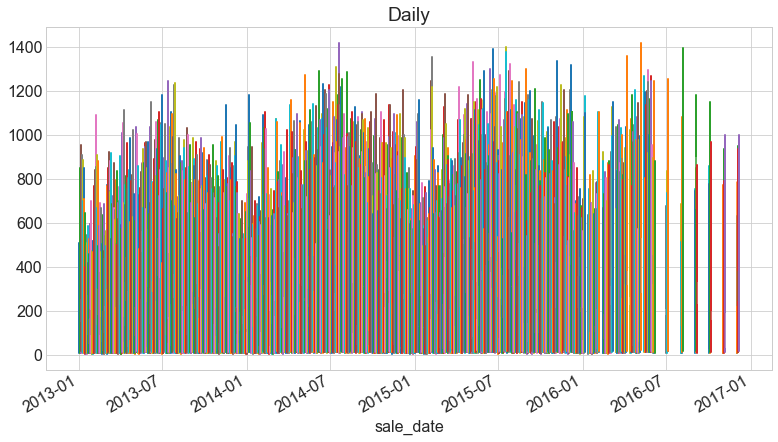

In [86]:
y.resample('1D').plot(title="Daily")

<AxesSubplot:title={'center':'monthly sales average'}, xlabel='sale_date'>

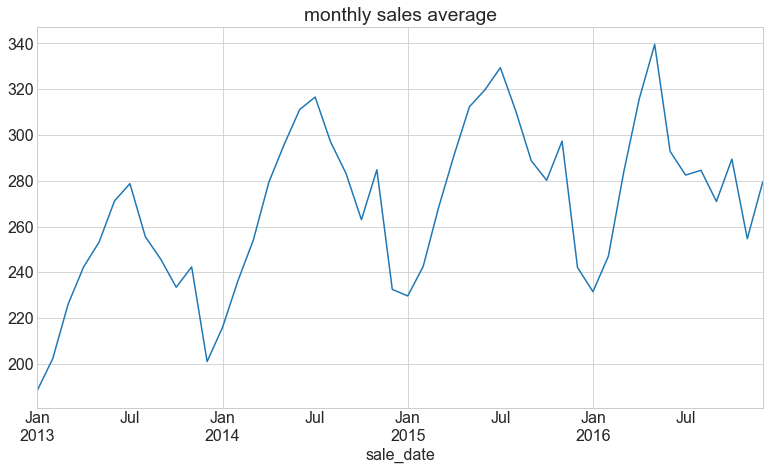

In [83]:
y.resample('1M').mean().plot(title='monthly sales average')

<AxesSubplot:title={'center':'6 month average'}, xlabel='sale_date'>

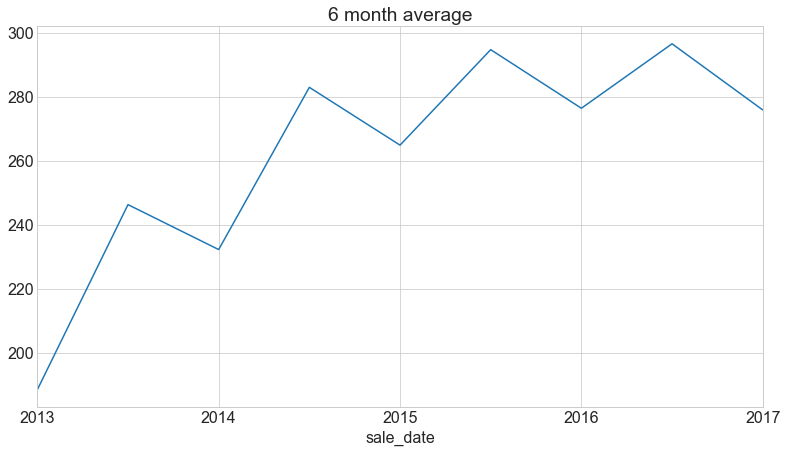

In [84]:
y.resample('6M').mean().plot(title="6 month average")

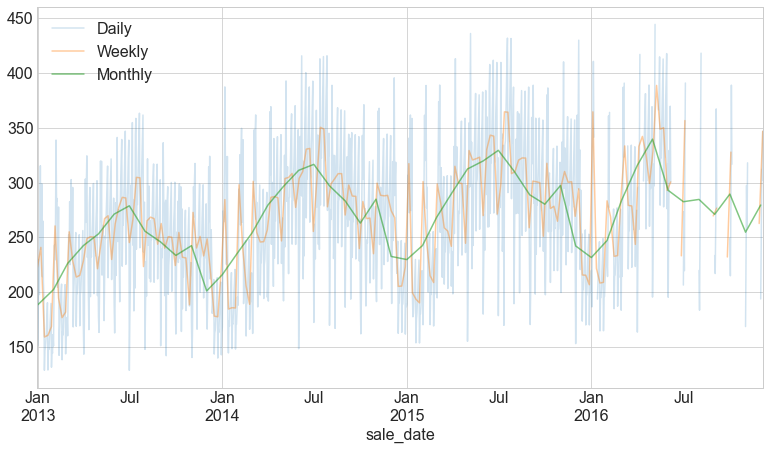

In [89]:
# multiple averages

y.resample('D').mean().plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.4, label='Weekly')
y.resample('M').mean().plot(alpha=.6, label='Monthly')
plt.legend()

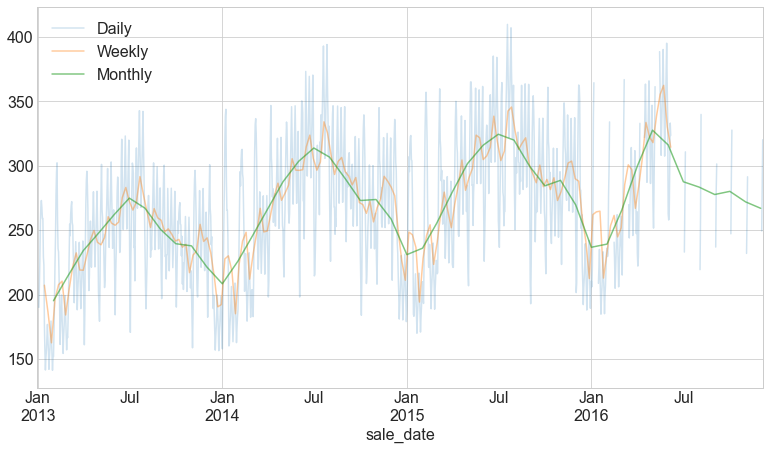

In [91]:
# rolling averages

y.resample('D').mean().rolling(3).mean().plot(alpha=.2, label='Daily')
y.resample('W').mean().rolling(3).mean().plot(alpha=.4, label='Weekly')
y.resample('M').mean().rolling(2).mean().plot(alpha=.6, label='Monthly')
plt.legend()

<AxesSubplot:title={'center':'Daily difference in in Total Sales'}, xlabel='sale_date'>

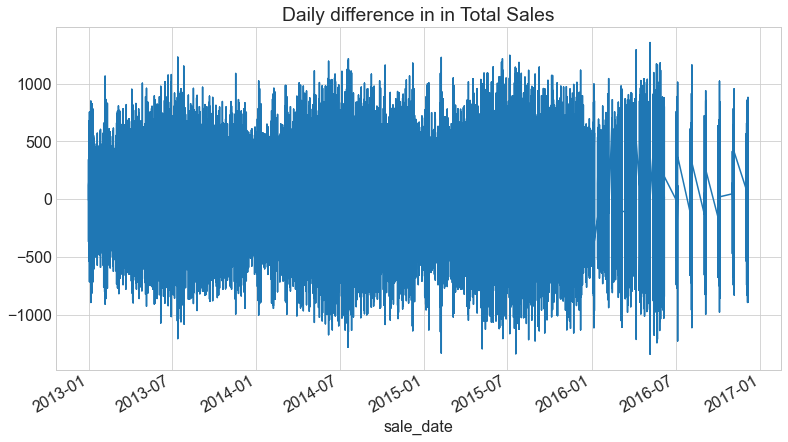

In [92]:
# Volatility, using .diff
# graphing the difference in daily sales (vs previous day)
y.diff().plot(title = 'Daily difference in in Total Sales')


<AxesSubplot:title={'center':'Daily % Change in Total Dollar Sales'}, xlabel='sale_date'>

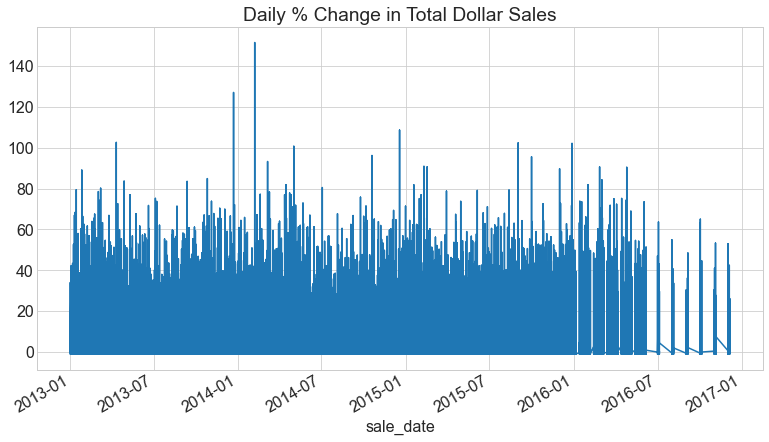

In [96]:
# graphing % change in sales using shift
(y.diff()/y.shift()).plot(title="Daily % Change in Total Dollar Sales")

TypeError: unsupported operand type(s) for /: 'method' and 'AxesSubplot'

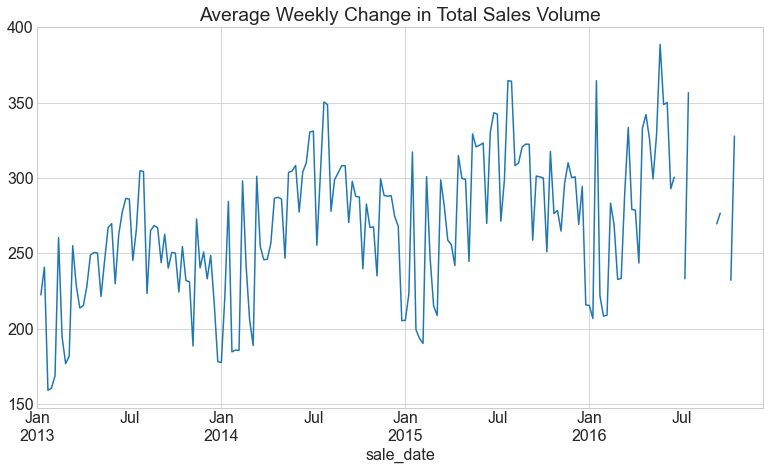

In [99]:
# get the weekly difference
y.resample('W').mean().diff/y.resample('W').mean().shift().plot(title="Average Weekly Change in Total Sales Volume")

TypeError: unsupported operand type(s) for /: 'method' and 'AxesSubplot'

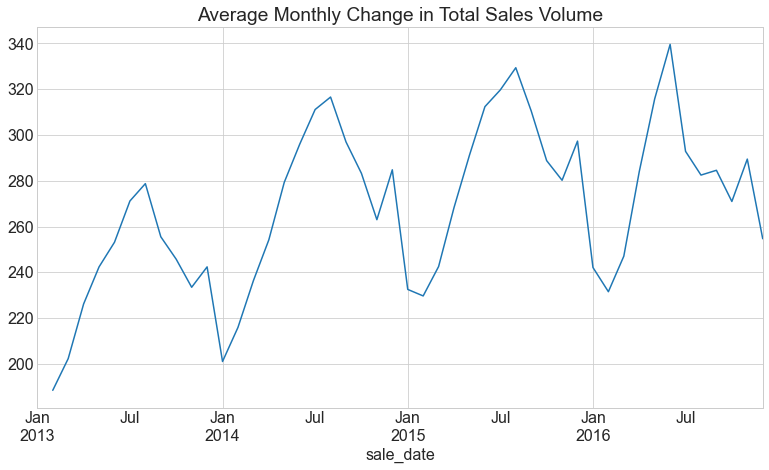

In [100]:
# get the monthly difference
y.resample('M').mean().diff/y.resample('M').mean().shift().plot(title="Average Monthly Change in Total Sales Volume")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

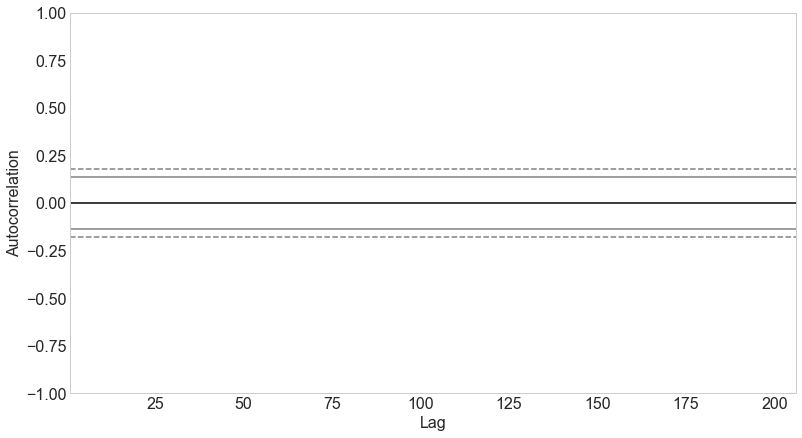

In [103]:
# autocorrelation plot on the weeklu resampling
pd.plotting.autocorrelation_plot(y.resample('W').mean())